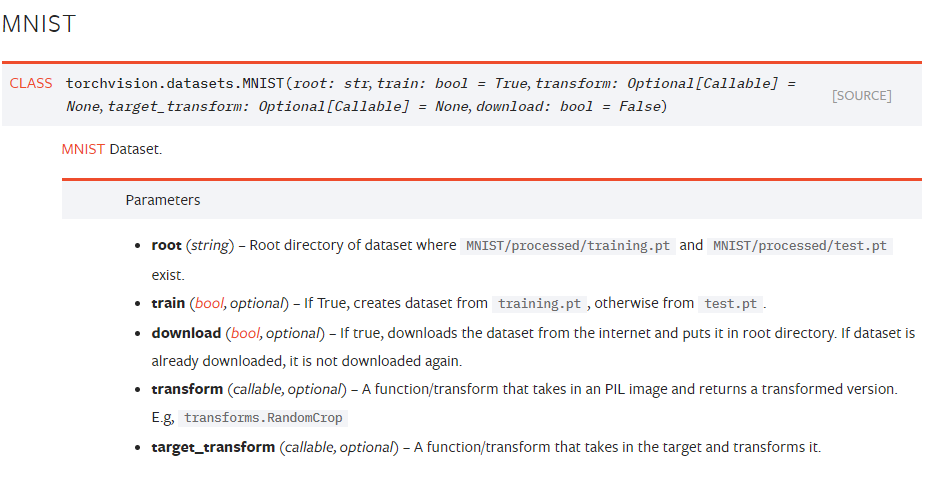

In [1]:
from IPython.display import Image
Image("./img/img2.PNG")


https://pytorch.org/vision/stable/datasets.html

In [2]:
import torch, torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

In [3]:
#!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/train-images-idx3-ubyte.gz
MNIST/processed/
MNIST/processed/training.pt
MNIST/processed/test.pt


In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'

In [21]:
torch.manual_seed(777)

In [22]:
learning_rate = 0.001
training_epochs = 15
batch_size = 64

In [23]:
trainset = torchvision.datasets.MNIST(root='./',
                                      train=True,
                                      transform=transforms.ToTensor(),
                                      download=True)

testset = torchvision.datasets.MNIST(root='./',
                                      train=False,
                                      transform=transforms.ToTensor(),
                                      download=False)

In [24]:
trainloader = torch.utils.data.DataLoader(dataset=trainset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                         drop_last=True)

In [25]:
for images, labels in trainloader:
    print(images.size(), labels.size())
    break

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [26]:
batches = iter(trainloader)
one_batch = next(batches)
one_batch

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [27]:
images, labels = one_batch

In [28]:
len(images)

64

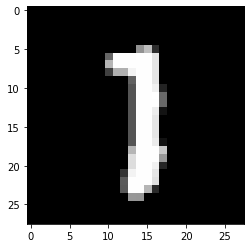

In [29]:
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')

# 모델 만들어 봅시다.

In [30]:
from torch import nn, optim

In [31]:
class Net(nn.Module):
    def __init__(self): #초기화 함수
        super().__init__() #초기화 및 사용할 레이어 정의
        self.hidden = nn.Linear(28*28, 512) 
        self.output = nn.Linear(512, 10) 
        
        self.sigmoid = nn.Sigmoid() 
        self.softmax = nn.LogSoftmax(dim=1) 
    
    def forward(self, x): #실제 학습 순서 정의
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [32]:
model = Net().to(device)
model

Net(
  (hidden): Linear(in_features=784, out_features=512, bias=True)
  (output): Linear(in_features=512, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): LogSoftmax(dim=1)
)

In [33]:
criterion = nn.NLLLoss().to(device)

In [34]:
images, labels = next(iter(trainloader))

In [35]:
images = images.view(images.shape[0], -1)
logits = model(images)
loss = criterion(logits, labels)
loss

tensor(2.3307, grad_fn=<NllLossBackward>)

In [36]:
loss.backward()

In [37]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [38]:
optimizer.step()

In [39]:
total_batch = len(trainloader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 937


# 훈련 과정

In [40]:
for epoch in range(training_epochs):
    avg_cost = 0

    for images, labels in trainloader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        images = images.to(device)
        images = images.view(images.shape[0], -1)
        labels = labels.to(device)

        optimizer.zero_grad() # 그라디언트 초기화
        pred = model(images) #에측 결과 값 획득
        cost = criterion(pred, labels) #실제 값과 예측 값의 loss 구하기
        cost.backward() #역전파 수행
        optimizer.step() #파라미터 업데이트

        avg_cost += cost / total_batch #평균 loss 계산

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:    1] cost = 2.28635359
[Epoch:    2] cost = 2.2481029
[Epoch:    3] cost = 2.21107602
[Epoch:    4] cost = 2.17163587
[Epoch:    5] cost = 2.12853599
[Epoch:    6] cost = 2.0808301
[Epoch:    7] cost = 2.02800703
[Epoch:    8] cost = 1.96993792
[Epoch:    9] cost = 1.90645766
[Epoch:   10] cost = 1.83859861
[Epoch:   11] cost = 1.76679063
[Epoch:   12] cost = 1.69332516
[Epoch:   13] cost = 1.61865401
[Epoch:   14] cost = 1.54489565
[Epoch:   15] cost = 1.47286308


In [41]:
images, labels = next(iter(trainloader))
img = images[0].view(1, -1)

In [42]:
with torch.no_grad():
    logprobs = model(img)

In [43]:
logprobs

tensor([[-2.6686, -2.2777, -1.7415, -1.6049, -3.0609, -2.2492, -2.7250, -3.2354,
         -1.8711, -3.1992]])

In [44]:
probs = torch.exp(logprobs)
probs

tensor([[0.0694, 0.1025, 0.1753, 0.2009, 0.0468, 0.1055, 0.0655, 0.0393, 0.1539,
         0.0408]])

In [45]:
torch.argmax(probs)

tensor(3)